This is the first project that related to NLP. It'll will be quite basic project.At first phase I'll use the linear svm algorithm then start to use feature extraction techniques.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# get the data
sms_df = pd.read_csv('smsspamcollection.tsv', sep='\t')
sms_df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


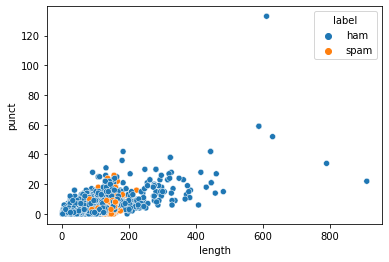

In [6]:
# visualize the data (there are outliers in the ham data) -> we can say spam messages approximatly contain 0-40 punct and their length generally between 150 and 210
sns.scatterplot(x='length', y='punct', data=sms_df, hue='label')

In [8]:
# split the data
X = sms_df.drop(['label', 'message'], axis=1) # there is no feature extraction so I have to drop message column to which probably decrease the accuracy of the data
y = sms_df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [20]:
# scale the X_train data 
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

In [21]:
# build the model
from sklearn.svm import LinearSVC
lsvc = LinearSVC(max_iter=5000)

lsvc.fit(X_train, y_train)

LinearSVC(max_iter=5000)

In [22]:
# predictions 
preds = lsvc.predict(X_test)

In [23]:
# the results
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n\n", confusion_matrix(y_test, preds))
print("\n\nClassification Report:\n\n", classification_report(y_test, preds))

Confusion Matrix:

 [[1566   27]
 [ 246    0]]


Classification Report:

               precision    recall  f1-score   support

         ham       0.86      0.98      0.92      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.85      1839
   macro avg       0.43      0.49      0.46      1839
weighted avg       0.75      0.85      0.80      1839



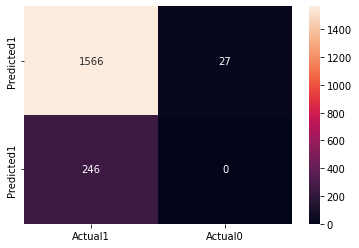

In [27]:
# we have 0.85 accuracy score but confusion matrix doesn't seem so good so let's visualizie it to see it more clear

con_df = pd.DataFrame(confusion_matrix(y_test, preds), columns=['Actual1', 'Actual0'], index=['Predicted1', 'Predicted1'])
sns.heatmap(con_df, annot=True, fmt='g') # I used fmt to see actual values otherwise there were scientific notation

It's not bad but we did not use the most important part of the data which is message column. So let's use feature extraction on the data and see how we can increase the accuracy score and develop the model.